In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from pathlib import Path

## Import normal peripheral blood cell dataset

In [32]:
#get path to data/main_dir
path_name = 'data/PBC_dataset_normal_DIB'
path = Path.cwd().parent / path_name

In [33]:
#create dataframe
df = pd.DataFrame()
df['img_paths'] = [image for image in path.glob('*/*')]
df['id'] = [image.stem.split('_')[1] for image in path.glob('*/*')]
df['label'] = [image.stem.split('_')[0] for image in path.glob('*/*')]

#id's are similar! Probably 1 patient for different cells

### Unique label

Most immature neutrophils (IG) as metamyelocytes, myelocytes and promyelocytes are difficult to differentiate and their separation are prone to debate.
Band neutrophils are also immature.
Segmented neutrophils are fully mature and can be merge with the category 'Neutrophil'

In [37]:
df['label'].unique()

array(['MO', 'ERB', 'PLATELET', 'BA', 'BNE', 'SNE', 'NEUTROPHIL', '.DS',
       'LY', 'EO', 'MMY', 'PMY', 'MY', 'IG'], dtype=object)

In [38]:
# Fusion of neutrophil sub-groups
df["label"] = df["label"].replace(to_replace = ["NEUTROPHIL","BNE","MY","MMY","PMY"], 
                                  value = ["SNE","IG","IG","IG","IG"])


The label `.DS` is not an image and should be removed (1 image)

In [72]:
df = df[~(df['label']=='.DS')]

In [73]:
df['label'].unique()

array(['MO', 'ERB', 'PLATELET', 'BA', 'IG', 'SNE', 'LY', 'EO'],
      dtype=object)

In [76]:
#We now have 8 classes
classes = df['label'].unique()

In [86]:
H = [imageio.imread(file).shape[0] for file in df['img_paths']]
W = [imageio.imread(file).shape[1] for file in df['img_paths']]

In [ ]:
print(df["height"].value_counts().sort_index())
print("--------------------------------------")
print(df["width"].value_counts().sort_index())
print("--------------------------------------")

# Quelques surprises au niveau de la taille des images... On rabote ?
pix_height = min(df["height"])
pix_width = min(df["width"])
print("Min Height : %i ; Min Width : %i"%(min(df["height"]),min(df["width"])))
print("--------------------------------------")

# Utile pour plus loin (cf. cellules "moyennes")
pix_height = min(pix_height,pix_width)
pix_width = pix_height

print("Min Height : %i ; Min Width : %i"%(pix_width, pix_height))

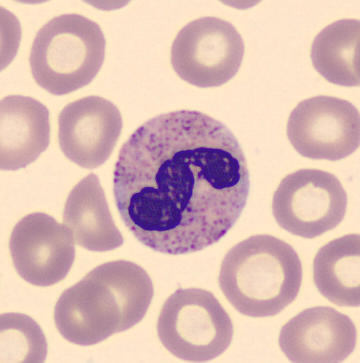

In [77]:
PIL.Image.open(df.loc[9146, 'img_paths'])

In [69]:
plt.imread('../data/PBC_dataset_normal_DIB/neutrophil/.DS_169665.jpg')

UnidentifiedImageError: cannot identify image file '../data/PBC_dataset_normal_DIB/neutrophil/.DS_169665.jpg'